___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# Quick Guide to Facebook's Prophet Basics
---
---

## IMPORTANT NOTE ONE:

**You should really read the papaer for Prophet! It is relatively straightforward and has a lot of insight on their techniques on how Prophet works internally!**

Link to paper: https://peerj.com/preprints/3190.pdf
---
---

## IMPORTANT NOTE TWO:

-----
------

* **NOTE: Link to installation instructions:** 
    * https://facebook.github.io/prophet/docs/installation.html#python 
    * SCROLL DOWN UNTIL YOU SEE THE ANACONDA OPTION AT THE BOTTOM OF THE PAGE.
    * YOU MAY NEED TO INSTALL BOTH **conda install gcc** and **conda install -c conda-forge fbprophet**
    * PLEASE READ THROUGH THE DOCS AND STACKOERFLOW CAREFULLY BEFORE POSTING INSTALLATION ISSUES TO THE QA FORUMS.

-----
----

## Load Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


## Load Data

The input to Prophet is always a dataframe with two columns: ds and y. The ds (datestamp) column should be of a format expected by Pandas, ideally YYYY-MM-DD for a date or YYYY-MM-DD HH:MM:SS for a timestamp. The y column must be numeric, and represents the measurement we wish to forecast.

In [2]:
df = pd.read_csv('BeerWineLiquor.csv')

In [3]:
df.head()

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 2 columns):
date    324 non-null object
beer    324 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.1+ KB


### Format the Data

In [6]:
## This is specific requirement from FB prophet hard coded column names
df.columns = ['ds','y']

In [7]:
df.head(2)

,ds,y
0,1/1/1992,1509
1,2/1/1992,1541


In [8]:
## also ds is pd datetime
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df[0:2]

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541


## Create and Fit Model

In [10]:
# This is fitting on all the data (no train test split in this example)
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


## Forecasting

### Step 1: Create "future" placeholder dataframe

**NOTE: Prophet by default is for daily data. You need to pass a frequency for sub-daily or monthly data. Info: https://facebook.github.io/prophet/docs/non-daily_data.html**

In [12]:
### Place holder for your predictions for coming 24 months
## frequency, facebook requires daily data by default so let's chage to monthly MS
future = model.make_future_dataframe(periods=24,freq = 'MS')

In [13]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [14]:
future.tail()

,ds
343,2020-08-01
344,2020-09-01
345,2020-10-01
346,2020-11-01
347,2020-12-01


In [15]:
len(df)

324

In [16]:
len(future)

348


### Step 2: Predict and fill in the Future

In [17]:
forecast = model.predict(future)

In [18]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1778.389678,1149.628142,1474.229696,1778.389678,1778.389678,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,-461.901459,0.0,0.0,0.0,1316.488218
1,1992-02-01,1780.987184,1193.835513,1512.984790,1780.987184,1780.987184,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,-427.924955,0.0,0.0,0.0,1353.062229
2,1992-03-01,1783.417109,1439.402684,1751.909441,1783.417109,1783.417109,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,-179.677739,0.0,0.0,0.0,1603.739371
3,1992-04-01,1786.014616,1429.642427,1746.131016,1786.014616,1786.014616,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,-196.091481,0.0,0.0,0.0,1589.923135
4,1992-05-01,1788.528331,1674.933929,2002.382083,1788.528331,1788.528331,45.713009,45.713009,45.713009,45.713009,45.713009,45.713009,0.0,0.0,0.0,1834.241340


In [14]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
343,2020-08-01,5201.010945,5074.524666,5397.039919,5190.005465,5213.185170,40.218725,40.218725,40.218725,40.218725,40.218725,40.218725,0.0,0.0,0.0,5241.229670
344,2020-09-01,5217.085200,4932.976994,5246.885844,5205.065711,5230.470140,-132.884136,-132.884136,-132.884136,-132.884136,-132.884136,-132.884136,0.0,0.0,0.0,5084.201064
345,2020-10-01,5232.640931,5037.574360,5361.483095,5219.696878,5247.521702,-43.275393,-43.275393,-43.275393,-43.275393,-43.275393,-43.275393,0.0,0.0,0.0,5189.365538
346,2020-11-01,5248.715186,5168.423030,5502.051767,5234.716079,5264.968845,86.703091,86.703091,86.703091,86.703091,86.703091,86.703091,0.0,0.0,0.0,5335.418277
347,2020-12-01,5264.270916,6160.467499,6497.079944,5249.311816,5281.695680,1071.508751,1071.508751,1071.508751,1071.508751,1071.508751,1071.508751,0.0,0.0,0.0,6335.779667


In [15]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [19]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
336,2020-01-01,4632.015644,4477.354674,4791.853280
337,2020-02-01,4682.147555,4516.618736,4847.122283
338,2020-03-01,4945.507893,4782.258667,5102.721496
339,2020-04-01,4945.249558,4776.972368,5101.498294
340,2020-05-01,5202.688312,5041.431187,5365.226406
341,2020-06-01,5183.565324,5010.931458,5331.343616
342,2020-07-01,5316.228164,5145.884913,5479.601315
343,2020-08-01,5245.685462,5075.002884,5410.353706
344,2020-09-01,5088.565168,4929.874544,5252.148914
345,2020-10-01,5193.429163,5026.529058,5362.626248


### Plotting Forecast

We can use Prophet's own built in plotting tools

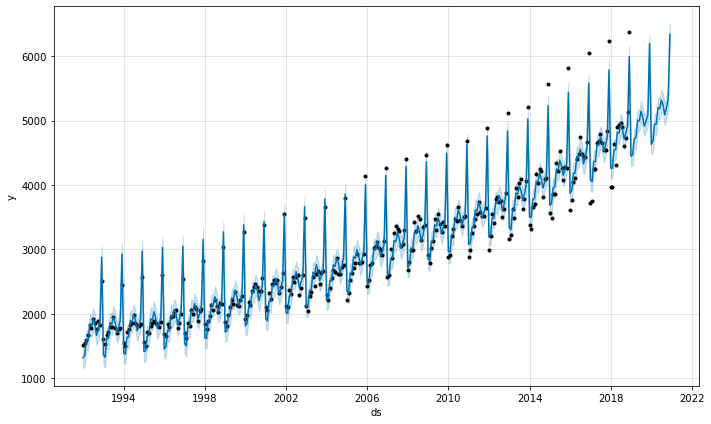

In [20]:
model.plot(forecast);

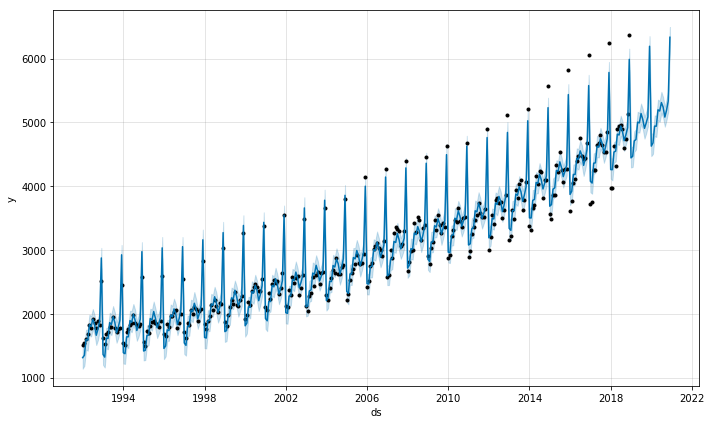

In [17]:
model.plot(forecast);

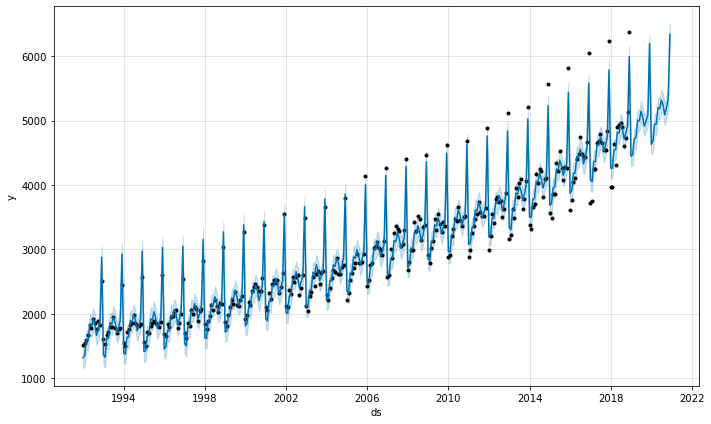

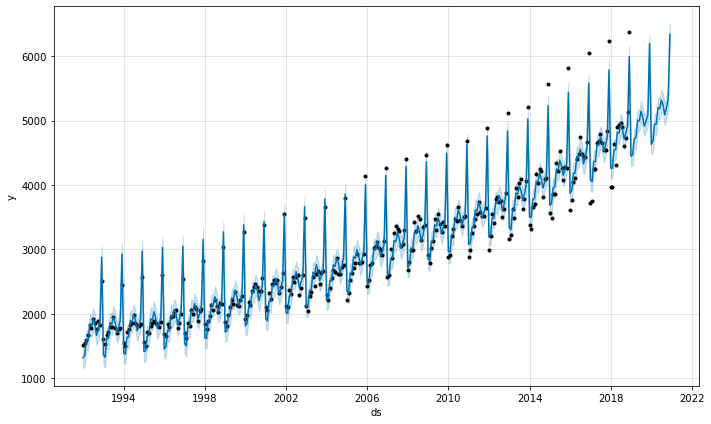

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
model.plot(forecast)


(735234.0, 738156.0)

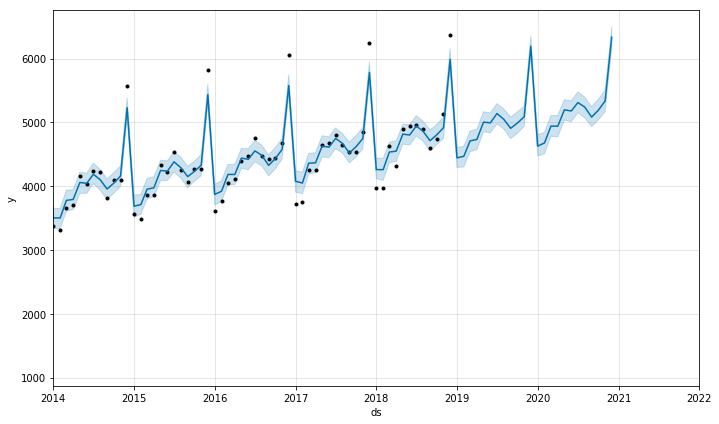

In [18]:
import matplotlib.pyplot as plt
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

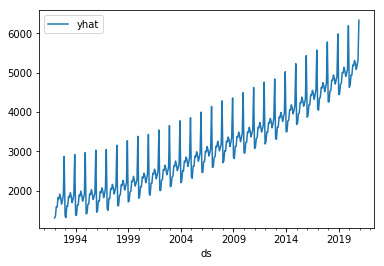

In [19]:
forecast.plot(x='ds',y='yhat')

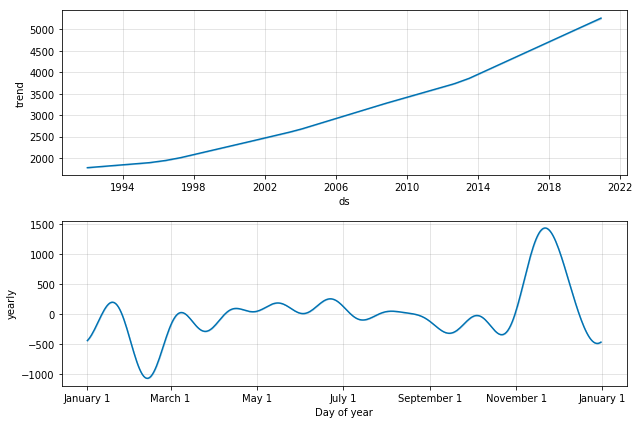

In [20]:
m.plot_components(forecast);


## Great Job!